<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Final Project</h1>



In [2]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 23.3 MB/s eta 0:00:00


In [3]:
!pip install bs4 

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=58666d77bf5d4042db7ce7c7e097950388ddc50e9c6002f32ac59608ba94e790
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:

tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.


In [6]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url)
soup = BeautifulSoup(html_data.text, "html5lib")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find('table')
for row in table.find_all('tr'):
    col = row.find_all("td")
    if len(col) > 0:  # Check if there are columns in this row
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",","")
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


Question 3: Use yfinance to Extract Stock Data

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. 
Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [10]:
gamestop = yf.Ticker("GME")

In [11]:
gme_data = gamestop.history(period = "max")


In [12]:
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [23]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [8]:

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find('tbody')
for row in table.find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$","").replace(",", "")
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

print(gme_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
tesla_data = yf.download("TSLA", start="2020-01-01", end="2021-06-30", progress=False)
revenue_data = yf.download("TSLA", start="2020-01-01", end="2021-06-30", progress=False)
tesla_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    


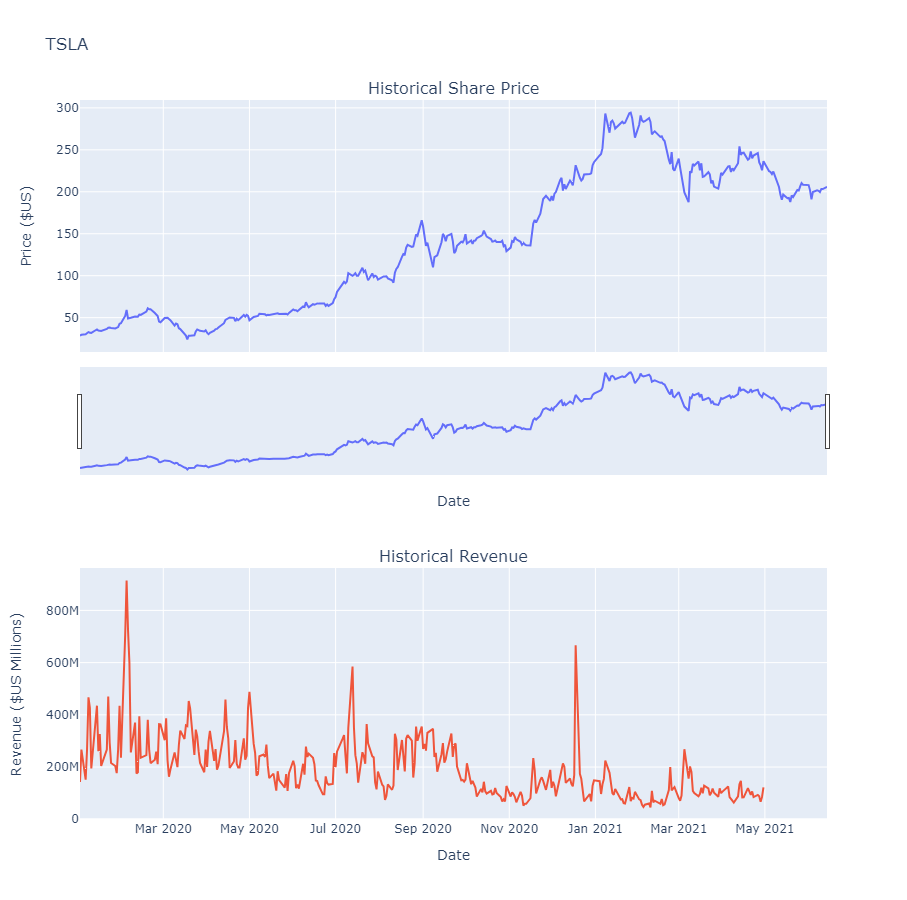

In [26]:
make_graph(tesla_data, revenue_data, 'TSLA')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [28]:
gme_data = yf.download("GME", start="2020-01-01", end="2021-06-30", progress=False)
revenue_data = yf.download("GME", start="2020-01-01", end="2021-06-30", progress=False)
gme_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    


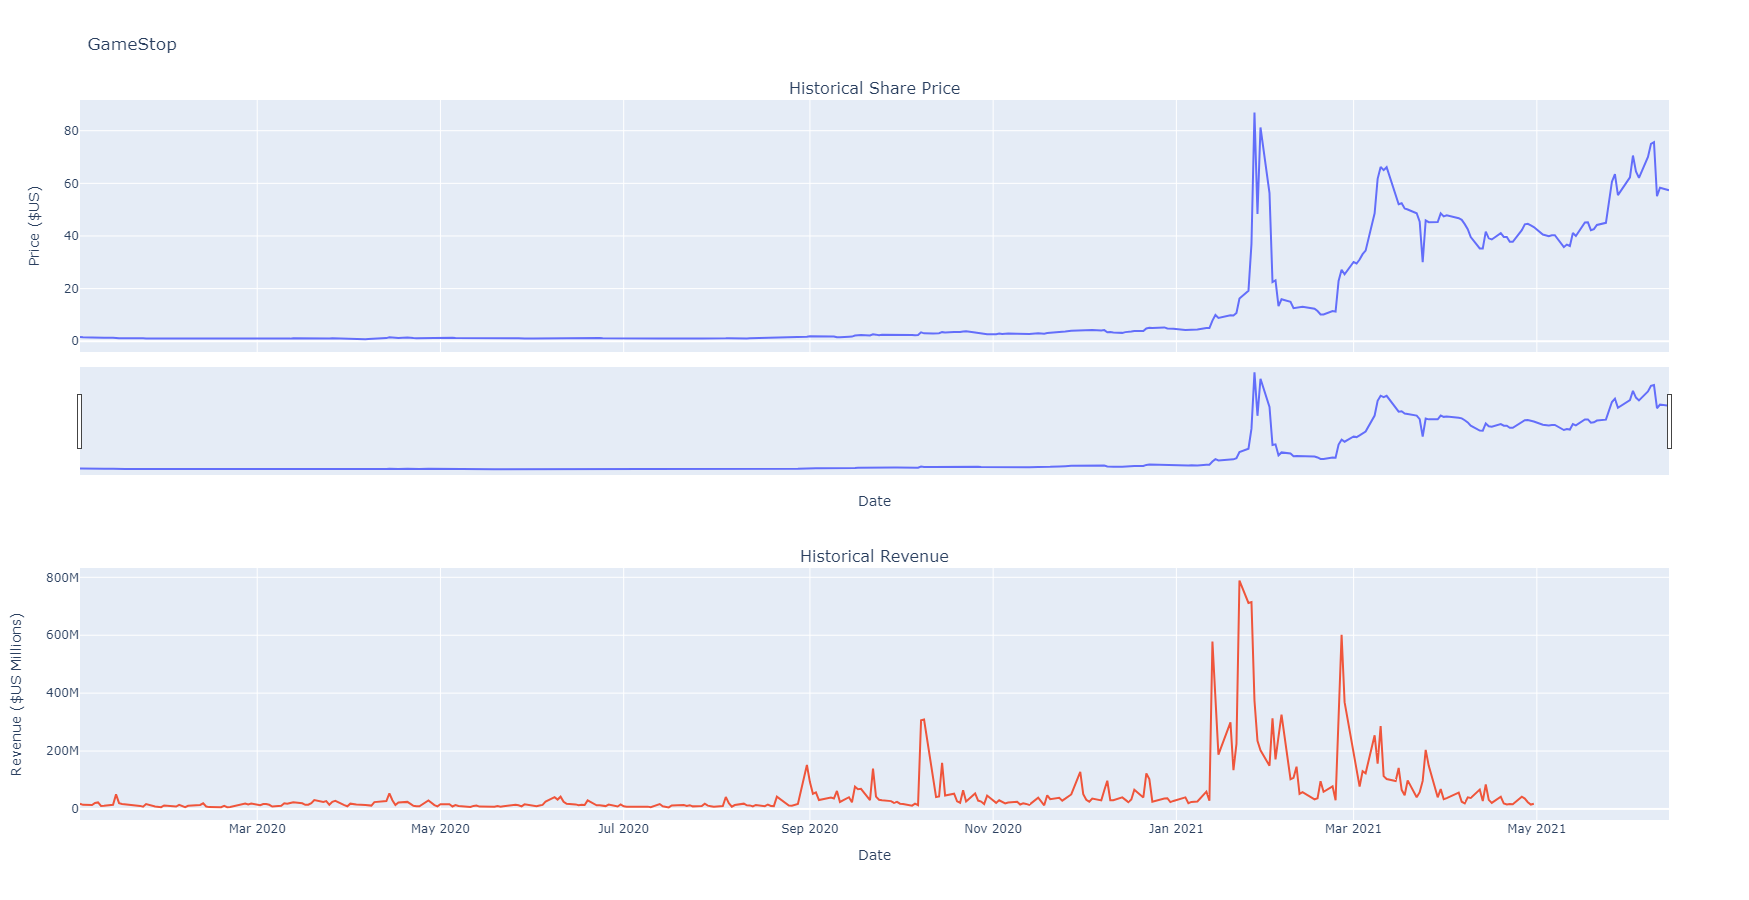

In [30]:
make_graph(gme_data, revenue_data, 'GameStop')